In [1]:
import pandas as pd
import numpy as np
import os
import random
import sys
import glob 
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv("dataset/city_day.csv")

In [9]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [10]:
dataset = dataset[dataset['City'] == 'Delhi']
print(dataset.head())
print('-----------------------------------------------------')
print("length of the new dataframe: ", len(dataset))

City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
10229  Delhi  2015-01-01  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
10230  Delhi  2015-01-02  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
10231  Delhi  2015-01-03   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
10232  Delhi  2015-01-04  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
10233  Delhi  2015-01-05  146.60  219.13  14.01  34.92   38.25  122.88   9.20   

        SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
10229  9.25  41.68    14.36    24.86    9.84  472.0     Severe  
10230  6.65  29.97    10.55    20.09    4.29  454.0     Severe  
10231  2.65  19.71     3.91    10.23    1.99  143.0   Moderate  
10232  4.63  25.36     4.26     9.71    3.34  319.0  Very Poor  
10233  3.33  23.20     2.80     6.21    2.96  325.0  Very Poor  
-----------------------------------------------------
length of the new dataframe:  2009


In [11]:
dataset = dataset[['Date','AQI']]
print(dataset.head())

Date    AQI
10229  2015-01-01  472.0
10230  2015-01-02  454.0
10231  2015-01-03  143.0
10232  2015-01-04  319.0
10233  2015-01-05  325.0


In [14]:
# total non missing AQI values
p = dataset[dataset['AQI'].notna()]
print(len(p))

1999


In [15]:
dataset['AQI'].fillna((dataset['AQI'].mean()), inplace=True)
dataset = dataset.reset_index()
dataset = dataset.drop(columns='index')

In [16]:
dataset = dataset[['AQI']]

In [21]:
dataset.shape

(2009, 1)

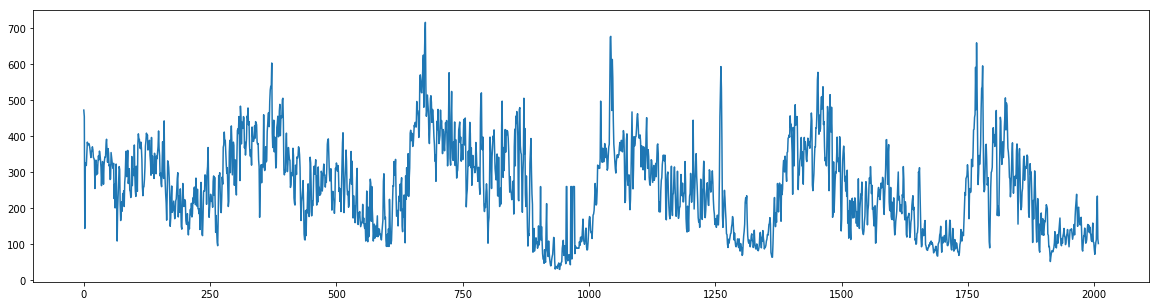

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5
plt.plot(dataset)

In [22]:
dataset.to_csv("dataset/pre_processed_dataset.csv", index=False)